In [1]:
import pandas

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
mapped_areas_df = pandas.read_csv("gmw_v314_annual_chngs_national_stats_mapped.csv", index_col="Unnamed: 0")
lower_areas_df = pandas.read_csv("gmw_v314_annual_chngs_national_stats_lower.csv", index_col="Unnamed: 0")
upper_areas_df = pandas.read_csv("gmw_v314_annual_chngs_national_stats_upper.csv", index_col="Unnamed: 0")

In [3]:
mapped_areas_df

,index,region,name,2007_area_gain,2008_area_gain,2009_area_gain,2010_area_gain,2015_area_gain,2016_area_gain,2017_area_gain,...,2007_area_loss,2008_area_loss,2009_area_loss,2010_area_loss,2015_area_loss,2016_area_loss,2017_area_loss,2018_area_loss,2019_area_loss,2020_area_loss
0,3,ASM,American Samoa,0.000000,0.000000,0.000000,0.058947,0.294734,0.000000,0.000000,...,0.176841,0.176836,0.235786,0.000000,0.000000,0.000000,0.000000,0.000000,0.176833,0.294732
1,5,AGO,Angola,241.987221,134.236541,264.821634,210.015171,256.244859,140.145784,308.105038,...,693.111174,324.813834,222.654918,241.049730,323.783728,445.841161,293.407983,464.439262,297.085189,323.581164
2,6,AIA,Anguilla,0.115654,0.000000,0.404757,0.925222,0.983064,0.115655,0.346953,...,1.329983,0.173470,0.231309,0.115654,0.057827,0.231308,0.578250,0.693904,0.578270,0.115654
3,8,ATG,Antigua and Barbuda,8.995709,16.949317,33.597409,54.483232,28.957154,34.460739,28.828473,...,79.244790,18.920970,24.144841,10.792004,24.543440,14.858038,18.628604,27.679768,30.518290,23.793689
4,11,ABW,Aruba,0.475057,0.000000,0.415692,0.890770,2.137799,0.000000,0.000000,...,9.323234,3.563011,1.068905,0.534462,0.712618,0.000000,0.000000,2.850402,0.000000,0.118763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,238,VUT,Vanuatu,11.498365,10.968181,23.695683,13.886460,15.876910,5.480616,22.818091,...,3.967017,9.033225,11.782676,18.969138,13.830259,17.321837,12.136615,26.093912,14.416839,79.173582
108,240,VEN,Venezuela,5727.888909,1781.094649,1848.734148,1952.983482,3371.421721,2205.908725,2452.112801,...,7054.475132,3056.239287,1982.509083,2142.069914,3017.614484,2349.475178,1517.591025,1490.315320,1470.504565,2080.390099
109,241,VNM,Vietnam,4421.618002,1929.186772,3324.669583,3574.458369,6268.914990,3963.678058,3914.977223,...,10760.008123,5595.052036,3780.888561,3998.834001,7468.730985,5574.440995,4030.331564,3545.554755,4290.354394,6065.330999
110,242,VIR,"Virgin Islands, U.S.",8.281069,6.254394,10.659905,11.358115,18.198001,8.630915,15.473390,...,20.748195,7.416599,9.443229,8.574025,7.822088,11.874888,12.689251,14.373251,11.531312,13.905864


In [9]:
country_lst = mapped_areas_df["name"].values
rgn_code_lst = mapped_areas_df["region"].values
countries_lut = dict()
regions_lut = dict()
for cntry, rgn in zip(country_lst, rgn_code_lst):
    countries_lut[cntry] = rgn
    regions_lut[rgn] = cntry

In [4]:
cols = mapped_areas_df.columns
cols_gain_area = list()
cols_loss_area = list()
for col in cols:
    if ("area" in col) and ("gain" in col):
        cols_gain_area.append(col)
    elif ("area" in col) and ("loss" in col):
        cols_loss_area.append(col)
print(cols_gain_area)
print(cols_loss_area)

['2007_area_gain', '2008_area_gain', '2009_area_gain', '2010_area_gain', '2015_area_gain', '2016_area_gain', '2017_area_gain', '2018_area_gain', '2019_area_gain', '2020_area_gain']
['2007_area_loss', '2008_area_loss', '2009_area_loss', '2010_area_loss', '2015_area_loss', '2016_area_loss', '2017_area_loss', '2018_area_loss', '2019_area_loss', '2020_area_loss']


In [8]:
mapped_areas_loss_df = mapped_areas_df.drop(columns=cols_gain_area)
mapped_areas_gain_df = mapped_areas_df.drop(columns=cols_loss_area)

lower_areas_loss_df = lower_areas_df.drop(columns=cols_gain_area)
lower_areas_gain_df = lower_areas_df.drop(columns=cols_loss_area)

upper_areas_loss_df = upper_areas_df.drop(columns=cols_gain_area)
upper_areas_gain_df = upper_areas_df.drop(columns=cols_loss_area)


In [10]:
rgn = "ASM"

In [24]:
years = [2007, 2008, 2009, 2010, 2015, 2016, 2017, 2018, 2019, 2020]

In [13]:
mapped_loss_row = mapped_areas_loss_df[mapped_areas_loss_df['region'] == rgn]
lower_loss_row = lower_areas_loss_df[lower_areas_loss_df['region'] == rgn]
upper_loss_row = upper_areas_loss_df[upper_areas_loss_df['region'] == rgn]

mapped_gain_row = mapped_areas_gain_df[mapped_areas_gain_df['region'] == rgn]
lower_gain_row = lower_areas_gain_df[lower_areas_gain_df['region'] == rgn]
upper_gain_row = upper_areas_gain_df[upper_areas_gain_df['region'] == rgn]


In [14]:
drop_cols = ["name", "region", "index"]
mapped_loss_row = mapped_loss_row.drop(columns=drop_cols)
lower_loss_row = lower_loss_row.drop(columns=drop_cols)
upper_loss_row = upper_loss_row.drop(columns=drop_cols)

mapped_gain_row = mapped_gain_row.drop(columns=drop_cols)
lower_gain_row = lower_gain_row.drop(columns=drop_cols)
upper_gain_row = upper_gain_row.drop(columns=drop_cols)

In [16]:
mng_loss_map_areas = mapped_loss_row.values[0]
mng_loss_low_areas = lower_loss_row.values[0]
mng_loss_upp_areas = upper_loss_row.values[0]

mng_gain_map_areas = mapped_gain_row.values[0]
mng_gain_low_areas = lower_gain_row.values[0]
mng_gain_upp_areas = upper_gain_row.values[0]

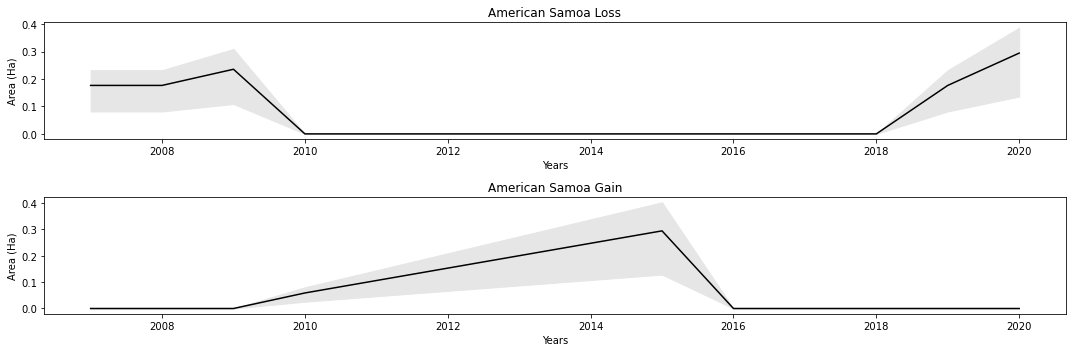

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))

ax1.plot(years, mng_loss_map_areas, color="black")
ax1.fill_between(years, mng_loss_low_areas, mng_loss_upp_areas, color=[0.9,0.9,0.9])
ax1.set_title("{} Loss".format(regions_lut[rgn]))
ax1.set_xlabel("Years")
ax1.set_ylabel("Area (Ha)")

ax2.plot(years, mng_gain_map_areas, color="black")
ax2.fill_between(years, mng_gain_low_areas, mng_gain_upp_areas, color=[0.9,0.9,0.9])
ax2.set_title("{} Gain".format(regions_lut[rgn]))
ax2.set_xlabel("Years")
ax2.set_ylabel("Area (Ha)")

fig.tight_layout()